<h1><center>Clusteranalysis on Creditcard-Dataset </center></h1>






**Import Packages**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering

**Import Data**

In [2]:
df = pd.read_csv('../input/ccdata/CC GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


**What are the variables?**

| Variable | Definition |
| :- | :- |
| CUSTID | Identification of Credit Card holder (Categorical)|
| BALANCE | Balance amount left in their account |
| BALANCEFREQUENCY | How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated) |
| PURCHASES | Amount of purchases made from account |
| ONEOFFPURCHASES | Maximum purchase amount done in one-go |
| INSTALLMENTSPURCHASES | Amount of purchase done in installment |
| CASHADVANCE | Cash in advance given by the user |
| PURCHASESFREQUENCY | How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased) |
| ONEOFFPURCHASESFREQUENCY | How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased) |
| PURCHASESINSTALLMENTSFREQUENCY | How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done) |
| CASHADVANCEFREQUENCY | How frequently the cash in advance being paid |
| CASHADVANCETRX | Number of Transactions made with "Cash in Advanced" |
| PURCHASESTRX | Number of purchase transactions made |
| CREDITLIMIT | Limit of Credit Card for user |
| PAYMENTS | Amount of Payment done by user |
| MINIMUM_PAYMENTS | Minimum amount of payments made by user |
| PRCFULLPAYMENT | Percent of full payment paid by user |
| TENURE | Tenure of credit card service for user |

In [3]:
df = df.drop(['CUST_ID'], axis=1)
df.shape

(8950, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [5]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


**Impute missing data with mean**

In [6]:
df.isnull().sum().sort_values(ascending=False).head()

MINIMUM_PAYMENTS          313
CREDIT_LIMIT                1
BALANCE                     0
CASH_ADVANCE_FREQUENCY      0
PRC_FULL_PAYMENT            0
dtype: int64

In [7]:
df.loc[(df['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].mean()
df.loc[(df['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT'] = df['CREDIT_LIMIT'].mean()

In [8]:
df.isnull().sum().sort_values(ascending=False).head()

BALANCE                   0
CASH_ADVANCE_FREQUENCY    0
PRC_FULL_PAYMENT          0
MINIMUM_PAYMENTS          0
PAYMENTS                  0
dtype: int64

**Data Visualization**

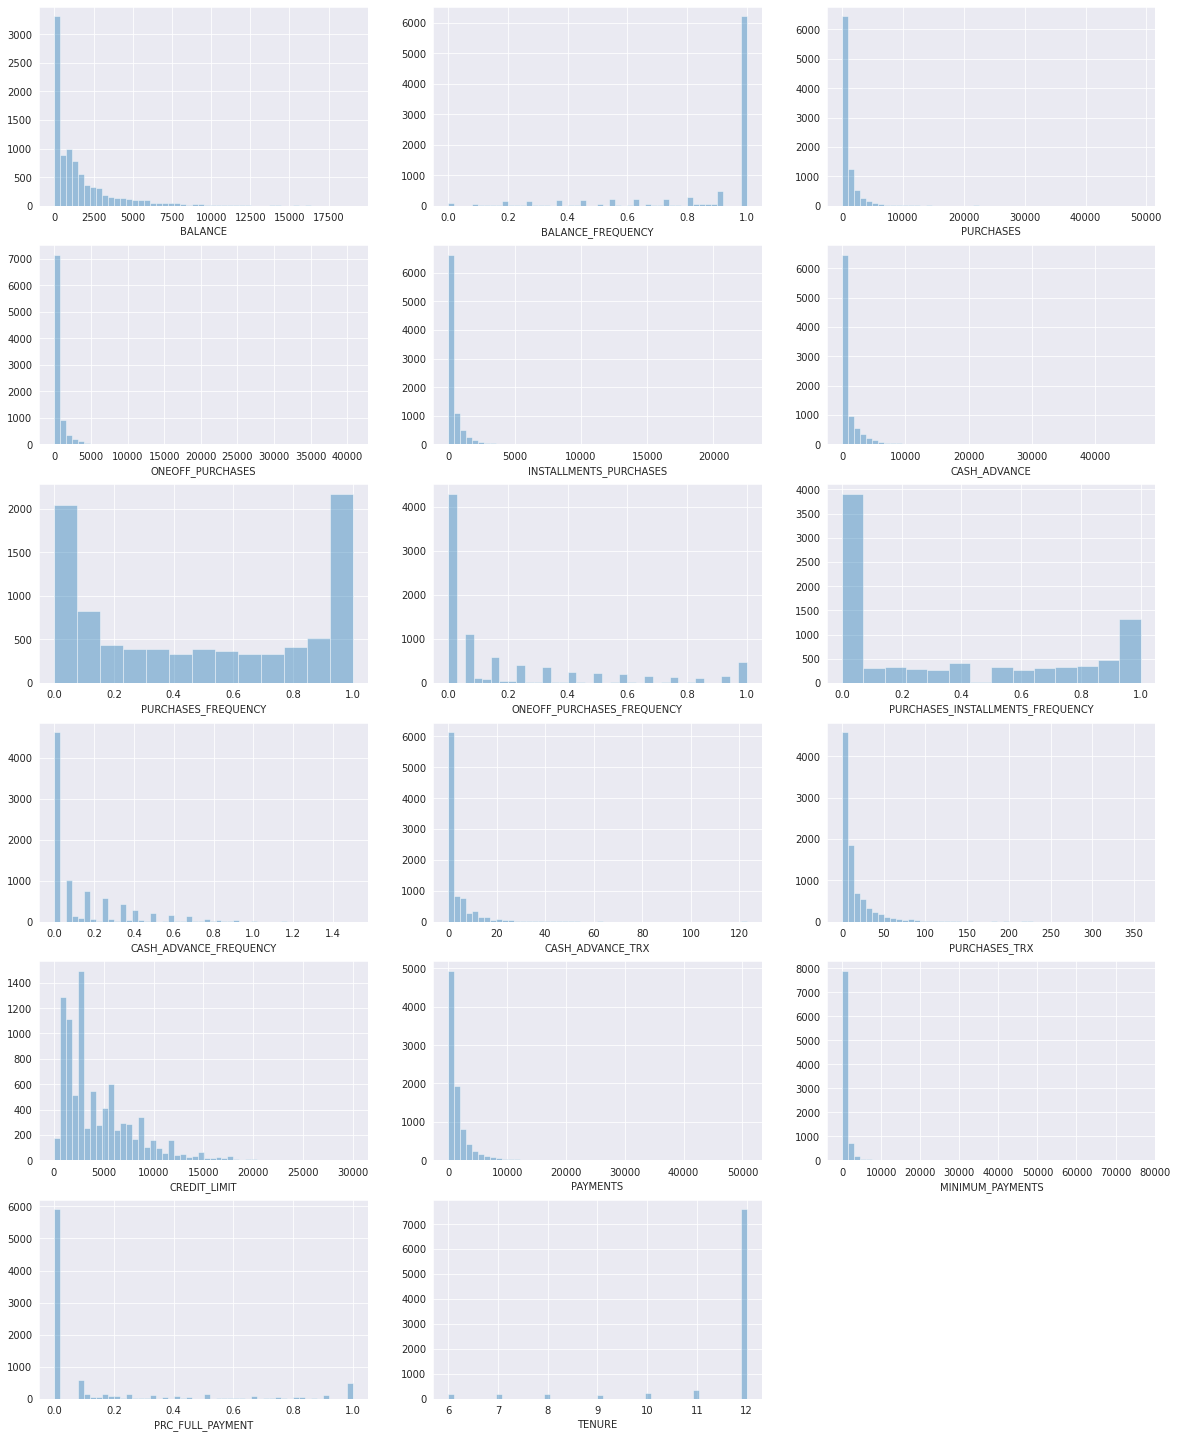

In [9]:
# Set up figure
sns.set_style("darkgrid")
fig = plt.figure(figsize = (20,30))

plot_feat = df.columns

for i, v in enumerate(plot_feat):
    axes = fig.add_subplot(7, 3, i+1)
    sns.distplot(df[v], kde = False, ax = axes)

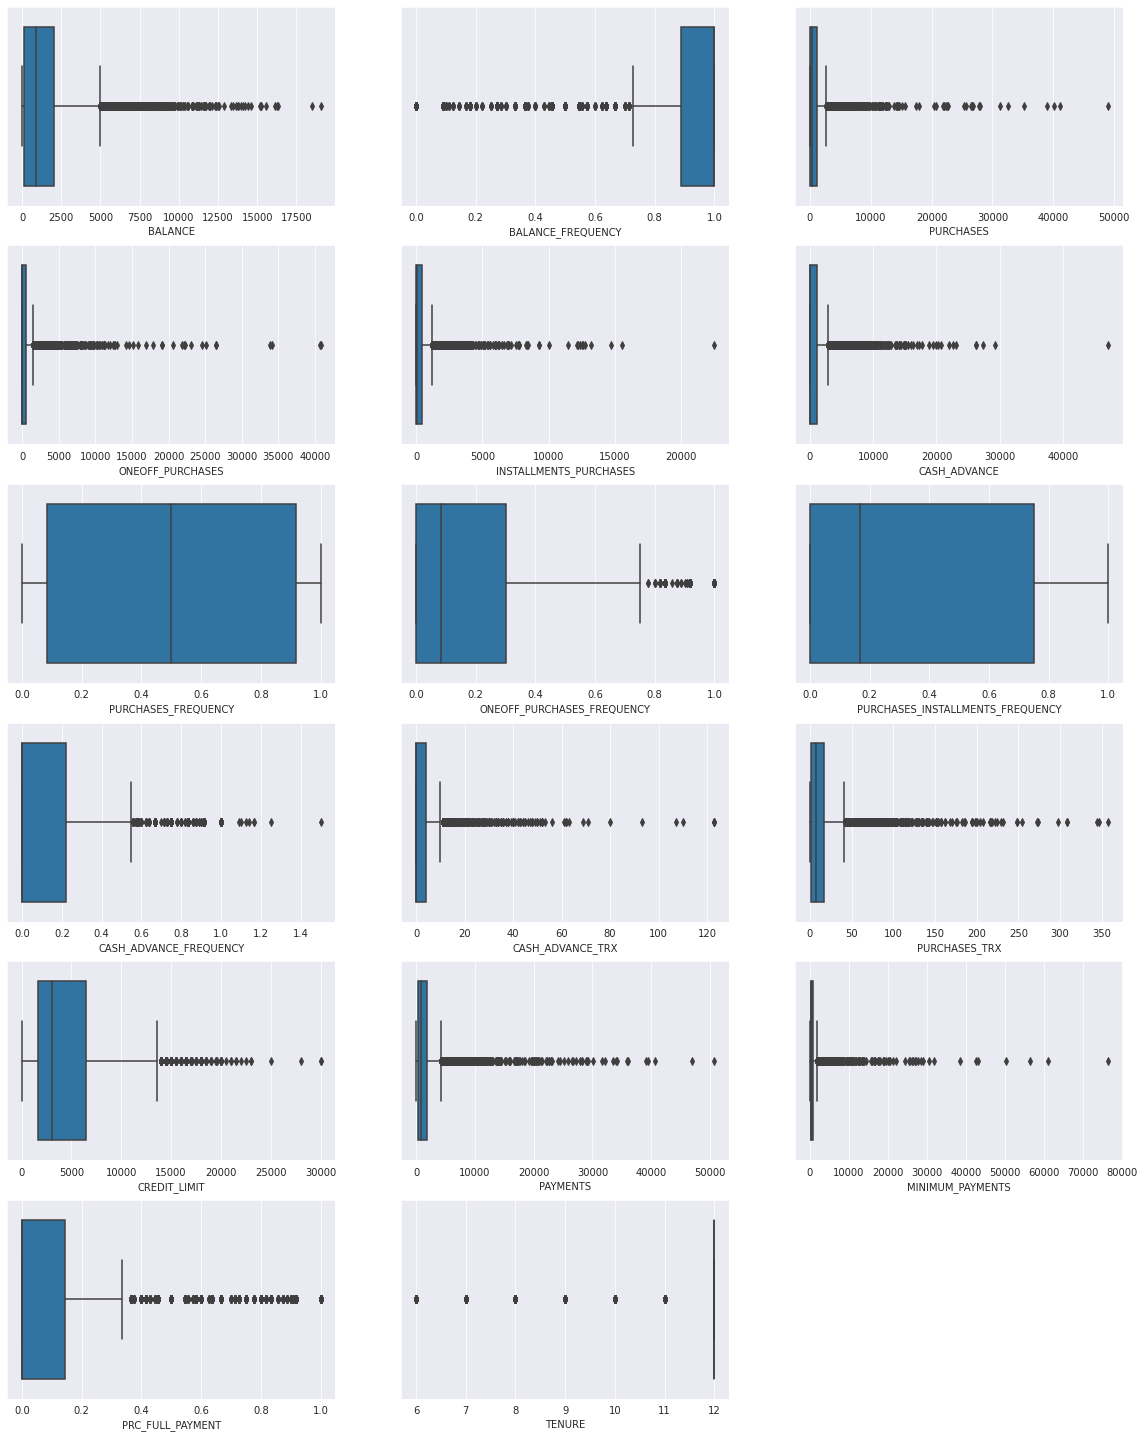

In [10]:
# Set up figure
fig = plt.figure(figsize = (20,30))

for i, v in enumerate(plot_feat):
    axes = fig.add_subplot(7, 3, i+1)
    sns.boxplot(x = df[v], ax = axes)

<AxesSubplot:>

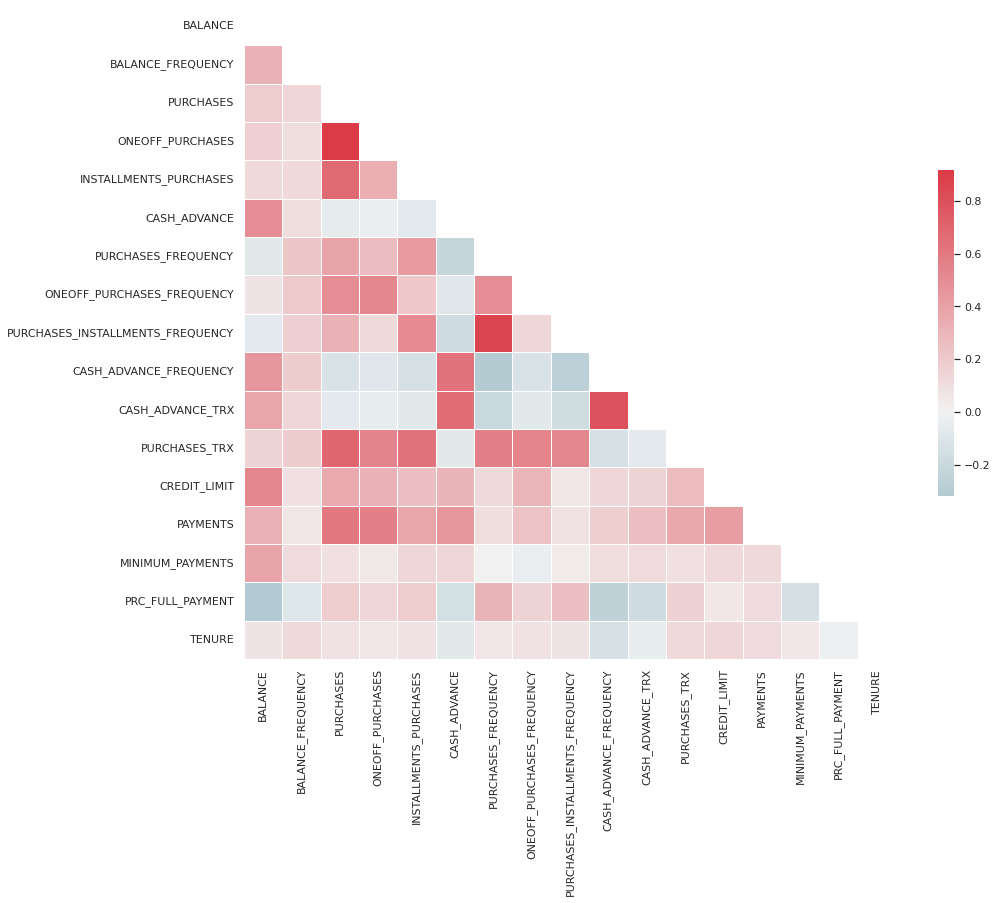

In [11]:
sns.set(style = "white")
cor_matrix = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(cor_matrix, dtype = np.bool))

plt.figure(figsize = (15, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap = True)

sns.heatmap(cor_matrix, mask = mask, cmap = cmap, center = 0,
            square = True, linewidths = .5, cbar_kws = {"shrink": .5})

## Data Preprocessing

**Dealing with outliers**

The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured.

In [12]:
# Compute Z-score for every variable
#z = np.abs(stats.zscore(df))

# Remove outliers from dataset
#df_rem = df[(z < 3).all(axis=1)]
#df_rem

Or simply take the log of right-skewed variables to ensure good clustering results.

In [13]:
# Take the log of right skewed data
cols =  ['BALANCE',
         'PURCHASES',
         'ONEOFF_PURCHASES',
         'INSTALLMENTS_PURCHASES',
         'CASH_ADVANCE',
         'CASH_ADVANCE_TRX',
         'PURCHASES_TRX',
         'CREDIT_LIMIT',
         'PAYMENTS',
         'MINIMUM_PAYMENTS',
        ]

# Note: Adding 1 for each value to avoid inf values
df[cols] = np.log(1 + df[cols])

df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3.735304,0.818182,4.568506,0.000000,4.568506,0.000000,0.166667,0.000000,0.083333,0.000000,0.000000,1.098612,6.908755,5.312231,4.945277,0.000000,12
1,8.071989,0.909091,0.000000,0.000000,0.000000,8.770896,0.000000,0.000000,0.000000,0.250000,1.609438,0.000000,8.853808,8.319725,6.978531,0.222222,12
2,7.822504,1.000000,6.651791,6.651791,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.564949,8.922792,6.434654,6.442994,0.000000,12
3,7.419183,0.636364,7.313220,7.313220,0.000000,5.331694,0.083333,0.083333,0.000000,0.083333,0.693147,0.693147,8.922792,0.000000,6.762968,0.000000,12
4,6.707735,1.000000,2.833213,2.833213,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.000000,0.693147,7.090910,6.521114,5.504483,0.000000,12


**Standardize data**

In [14]:
# Standardize data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(df)

# Retransform numpy array to pandas dataframe
scaled_df = pd.DataFrame(scaled_df, index = df.index, columns = df.columns) 

scaled_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03
mean,-5.844952e-17,1.209548e-14,1.379306e-15,1.040682e-14,-2.190179e-16,-6.788673e-16,-3.716084e-16,2.021052e-15,2.353921e-16,5.856519e-16,1.113944e-17,-8.335232e-16,1.102656e-14,4.272188e-16,4.168484e-16,-2.199184e-15,1.556446e-14
std,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00
min,-3.060633e+00,-3.703271e+00,-1.679855e+00,-9.870896e-01,-1.087454e+00,-9.307329e-01,-1.221758e+00,-6.786608e-01,-9.169952e-01,-6.753489e-01,-8.100687e-01,-1.379210e+00,-5.079426e+00,-4.161996e+00,-5.029436e+00,-5.255510e-01,-4.122768e+00
25%,-6.455634e-01,4.904486e-02,-4.097152e-01,-9.870896e-01,-1.087454e+00,-9.307329e-01,-1.014125e+00,-6.786608e-01,-9.169952e-01,-6.753489e-01,-8.100687e-01,-8.746552e-01,-8.742015e-01,-4.229376e-01,-6.823894e-01,-5.255510e-01,3.606795e-01
50%,3.039373e-01,5.180838e-01,3.403734e-01,1.414854e-01,3.721960e-01,-9.307329e-01,2.404259e-02,-3.993193e-01,-4.976286e-01,-6.753489e-01,-8.100687e-01,1.344545e-01,-1.075773e-01,8.164312e-02,-1.124294e-01,-5.255510e-01,3.606795e-01
75%,7.284269e-01,5.180838e-01,7.246132e-01,9.722184e-01,9.081215e-01,1.036809e+00,1.062211e+00,3.269728e-01,9.701506e-01,4.351492e-01,7.846025e-01,7.247459e-01,8.355906e-01,5.818980e-01,6.878466e-01,-3.712234e-02,3.606795e-01
max,1.834341e+00,5.180838e-01,2.023087e+00,2.283062e+00,2.163264e+00,2.086805e+00,1.269843e+00,2.673451e+00,1.599199e+00,6.820521e+00,3.965987e+00,2.903371e+00,2.701494e+00,2.644753e+00,4.486544e+00,2.893453e+00,3.606795e-01


## Agglomerative Clustering

**Compute distance matrix**

In [15]:
# Compute inverse sample covariance
cov = scaled_df.cov()
cov_inv = pd.DataFrame(np.linalg.inv(cov.values), cov.columns, cov.index)

# Compute mahalanobis distance matrix using scipy library
dist = distance.pdist(scaled_df, 'mahalanobis', VI = cov_inv)
dist_mat = distance.squareform(dist)
dist_mat.shape

(8950, 8950)

The function distance.pdist returns a condensed distance matrix dist. For each i and j (where i<j<n), where n is the number of original observations. The metric dist(u=X[i], v=X[j]) is computed and stored in entry n * i + j - ((i + 2) * (i + 1)) // 2.
That is why we have to transform it back to the sqaureform.

**Perform hierarchical agglomerative clustering**

In [16]:
# Function for different linkage criterions
def clustering_linkage(dist, link):
    hier = linkage(dist, link)
    hier = np.around(hier, decimals = 2)
    fig = plt.figure(figsize=(25, 10))
    dn = dendrogram(hier, p = 30, truncate_mode = 'lastp')
    plt.show()
    return hier

In [17]:
# Function which plots distances of the last 20 merged clusters
def get_distances(hier):
    distances = hier[-20:,2]
    num_clus = np.arange(20, 0, -1)
    

    d = {'Number of Clusters': num_clus, 'Distance between merged Clusters': distances}
    df_dist = pd.DataFrame(d)

    plt.figure(figsize=(15, 8))
    sns.barplot(x = "Number of Clusters", y = "Distance between merged Clusters", data = df_dist)

**Complete linkage**

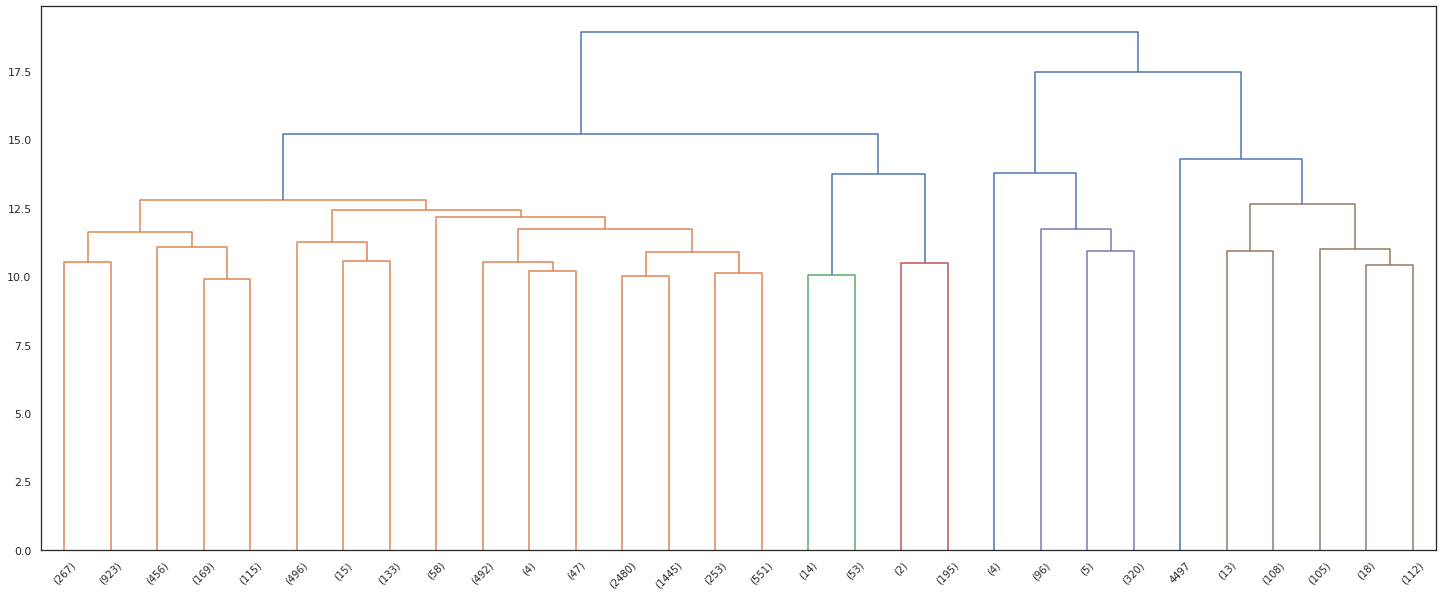

This is what the linkage algorithm returns:


array([[6.0440e+03, 7.2570e+03, 7.0000e-02, 2.0000e+00],
       [5.3230e+03, 7.9580e+03, 9.0000e-02, 2.0000e+00],
       [2.1730e+03, 7.0340e+03, 1.0000e-01, 2.0000e+00],
       ...,
       [1.7892e+04, 1.7893e+04, 1.5210e+01, 8.1680e+03],
       [1.7894e+04, 1.7895e+04, 1.7480e+01, 7.8200e+02],
       [1.7896e+04, 1.7897e+04, 1.8920e+01, 8.9500e+03]])

In [18]:
# complete linkage
hier_com = clustering_linkage(dist, 'complete')
print("This is what the linkage algorithm returns:")
hier_com

Let's have a look at the cluster distances of the last 20 merges to decide for the optimal number of clusters:

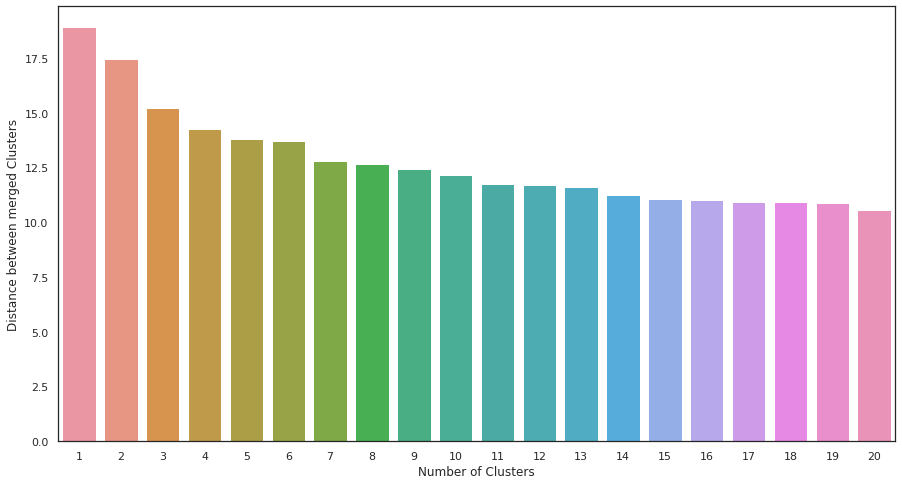

In [19]:
# Plot distances of last 20 merged clusters
get_distances(hier_com)

**Single linkage**

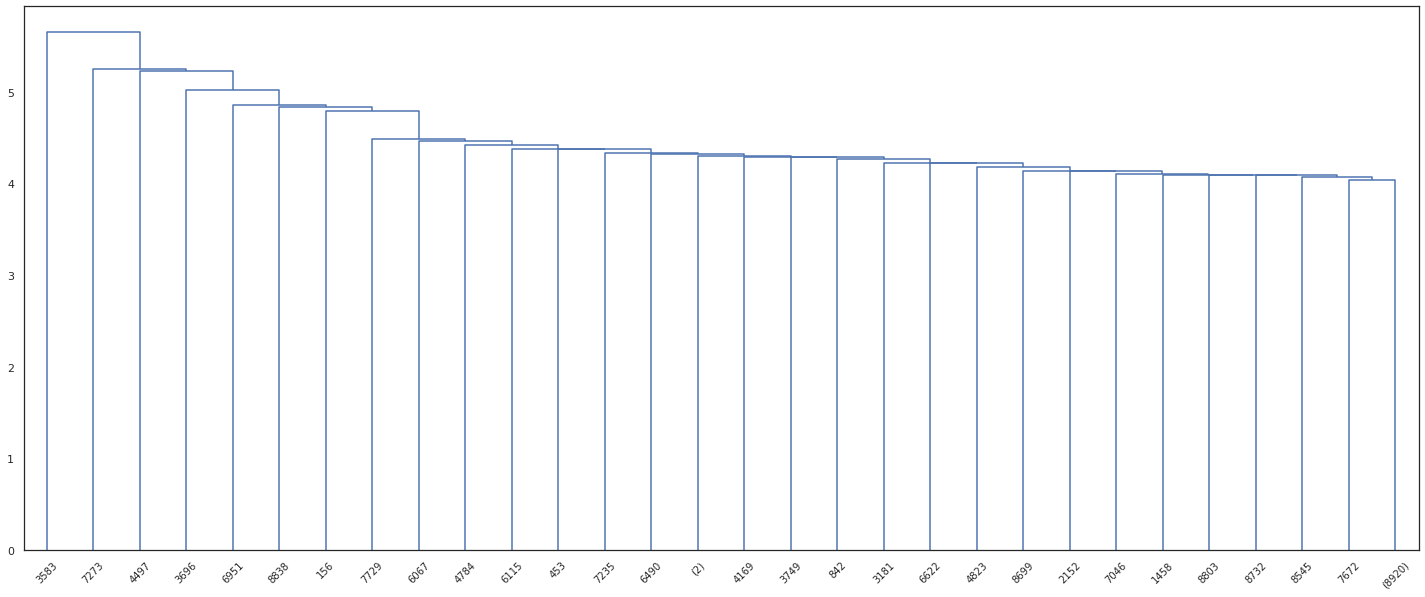

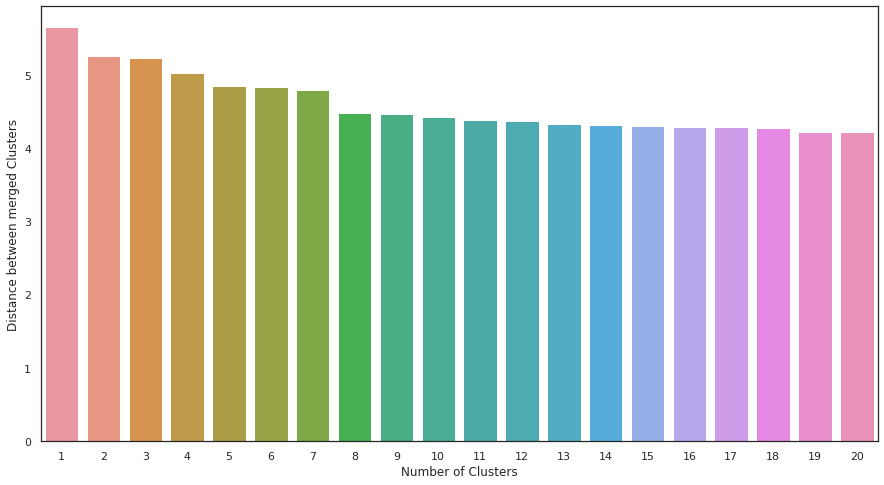

In [20]:
# single linkage
hier_sin = clustering_linkage(dist, 'single')
get_distances(hier_sin)

**Average linkage**

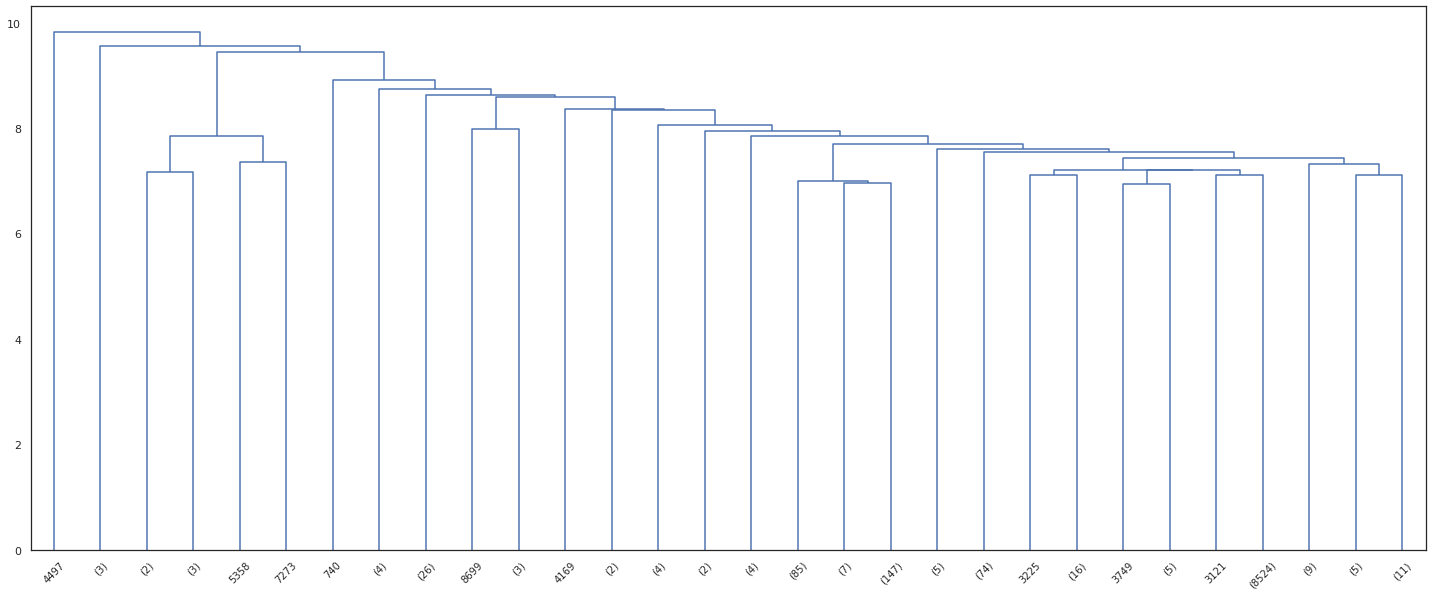

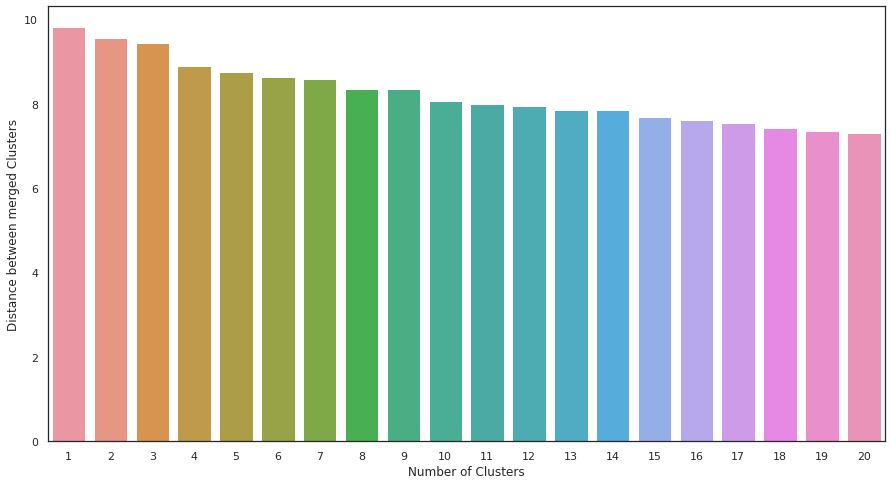

In [21]:
# average linkage
hier_ave = clustering_linkage(dist, 'average')
get_distances(hier_ave)

Complete linkage yielded the best results. We will go with an amount of 3 Clusters as the jump in the heterogeneity index seems the highest from 3 clusters to 2!

**Assign each observation to a cluster**

In [22]:
# Clusterassignment
clus_ass = fcluster(hier_com, t = 16, criterion='distance')
clus_ass

array([1, 1, 1, ..., 3, 1, 1], dtype=int32)

In [23]:
# Add Clusterassignment to dataframe
df['cluster'] = clus_ass.tolist()
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,3.735304,0.818182,4.568506,0.000000,4.568506,0.000000,0.166667,0.000000,0.083333,0.000000,0.000000,1.098612,6.908755,5.312231,4.945277,0.000000,12,1
1,8.071989,0.909091,0.000000,0.000000,0.000000,8.770896,0.000000,0.000000,0.000000,0.250000,1.609438,0.000000,8.853808,8.319725,6.978531,0.222222,12,1
2,7.822504,1.000000,6.651791,6.651791,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.564949,8.922792,6.434654,6.442994,0.000000,12,1
3,7.419183,0.636364,7.313220,7.313220,0.000000,5.331694,0.083333,0.083333,0.000000,0.083333,0.693147,0.693147,8.922792,0.000000,6.762968,0.000000,12,3
4,6.707735,1.000000,2.833213,2.833213,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.000000,0.693147,7.090910,6.521114,5.504483,0.000000,12,1


## Visualization and Interpretation of results

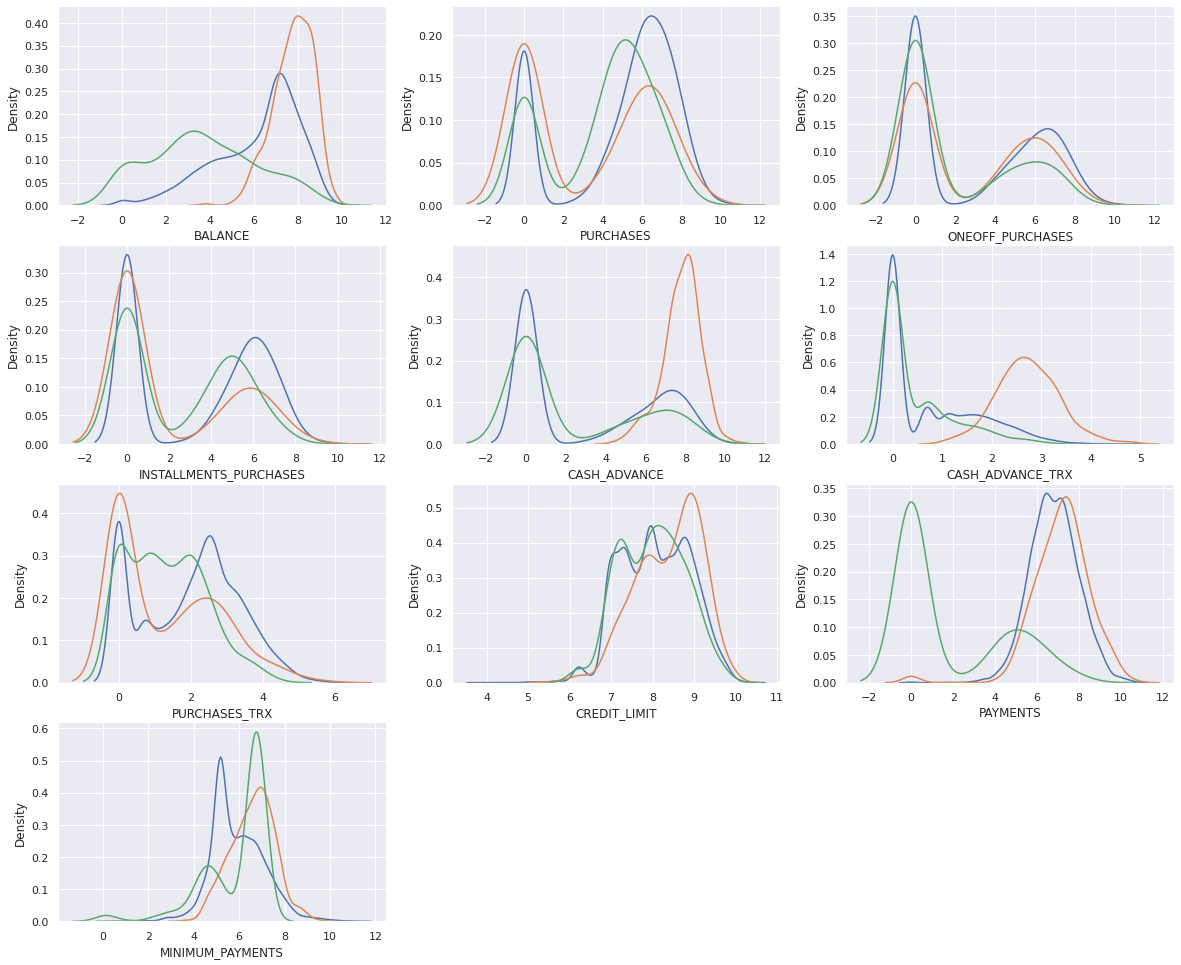

In [24]:
# Sort the dataframe by target
df_1 = df.loc[df['cluster'] == 1]
df_2 = df.loc[df['cluster'] == 2]
df_3 = df.loc[df['cluster'] == 3]

# Set up figure
sns.set_style("darkgrid")
fig = plt.figure(figsize = (20,30))

plot_feat = cols

for i, v in enumerate(plot_feat):
    axes = fig.add_subplot(7, 3, i+1)
    sns.distplot(df_1[v], hist=False, ax = axes)
    sns.distplot(df_2[v], hist=False, ax = axes)
    sns.distplot(df_3[v], hist=False, ax = axes)